In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import r_regression

# Data Preprocessing

In [35]:
#data processing
df = pd.read_csv("meat_consumption_worldwide.csv")

In [36]:
df.head()

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,BEEF,KG_CAP,1991,27.721815
1,AUS,BEEF,KG_CAP,1992,26.199591
2,AUS,BEEF,KG_CAP,1993,26.169094
3,AUS,BEEF,KG_CAP,1994,25.456134
4,AUS,BEEF,KG_CAP,1995,25.340226


In [4]:
cols_with_missing = pd.Series(['TIME','Value'])

In [5]:
#changes value if exactly 0 to nan
df[cols_with_missing]=df[cols_with_missing].replace(0,np.nan)

In [6]:
print(df.head(10))
print(df.isnull().sum())

  LOCATION SUBJECT MEASURE  TIME      Value
0      AUS    BEEF  KG_CAP  1991  27.721815
1      AUS    BEEF  KG_CAP  1992  26.199591
2      AUS    BEEF  KG_CAP  1993  26.169094
3      AUS    BEEF  KG_CAP  1994  25.456134
4      AUS    BEEF  KG_CAP  1995  25.340226
5      AUS    BEEF  KG_CAP  1996  27.259104
6      AUS    BEEF  KG_CAP  1997  28.802913
7      AUS    BEEF  KG_CAP  1998  26.590477
8      AUS    BEEF  KG_CAP  1999  27.918283
9      AUS    BEEF  KG_CAP  2000  26.354624
LOCATION    0
SUBJECT     0
MEASURE     0
TIME        0
Value       0
dtype: int64


In [33]:
df.head()

,MEASURE,TIME,Value,LOCATION_ARG,LOCATION_AUS,LOCATION_BGD,LOCATION_BRA,LOCATION_BRICS,LOCATION_CAN,LOCATION_CHE,...,LOCATION_URY,LOCATION_USA,LOCATION_VNM,LOCATION_WLD,LOCATION_ZAF,LOCATION_ZMB,SUBJECT_BEEF,SUBJECT_PIG,SUBJECT_POULTRY,SUBJECT_SHEEP
0,KG_CAP,1991,27.721815,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,KG_CAP,1992,26.199591,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,KG_CAP,1993,26.169094,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,KG_CAP,1994,25.456134,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,KG_CAP,1995,25.340226,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [32]:
df['LOCATION'].unique()

KeyError: 'LOCATION'

# Encoding the categorical Data

In [7]:
#filling up missing values with mean value for each missing rows
df = df.fillna(df.mean(numeric_only=True).round(1))

In [8]:
numeric_columns = ['TIME','Value']

## Encoding the independent variable

In [9]:
df['LOCATION'].unique()

array(['AUS', 'CAN', 'JPN', 'KOR', 'MEX', 'NZL', 'TUR', 'USA', 'DZA',
       'ARG', 'BGD', 'BRA', 'CHL', 'CHN', 'COL', 'EGY', 'ETH', 'GHA',
       'HTI', 'IND', 'IDN', 'IRN', 'ISR', 'KAZ', 'MYS', 'MOZ', 'NGA',
       'PAK', 'PRY', 'PER', 'PHL', 'RUS', 'SAU', 'ZAF', 'SDN', 'TZA',
       'THA', 'UKR', 'URY', 'VNM', 'ZMB', 'WLD', 'SSA', 'OECD', 'BRICS',
       'EU28', 'NOR', 'CHE'], dtype=object)

In [10]:
df['TIME'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2024, 2025, 2026, 1990], dtype=int64)

In [11]:
df['SUBJECT'].unique()

array(['BEEF', 'PIG', 'POULTRY', 'SHEEP'], dtype=object)

In [12]:
df = pd.get_dummies(df, columns=["LOCATION","SUBJECT"])

In [13]:
df.head()

,MEASURE,TIME,Value,LOCATION_ARG,LOCATION_AUS,LOCATION_BGD,LOCATION_BRA,LOCATION_BRICS,LOCATION_CAN,LOCATION_CHE,...,LOCATION_URY,LOCATION_USA,LOCATION_VNM,LOCATION_WLD,LOCATION_ZAF,LOCATION_ZMB,SUBJECT_BEEF,SUBJECT_PIG,SUBJECT_POULTRY,SUBJECT_SHEEP
0,KG_CAP,1991,27.721815,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,KG_CAP,1992,26.199591,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,KG_CAP,1993,26.169094,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,KG_CAP,1994,25.456134,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,KG_CAP,1995,25.340226,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [14]:
categorical_columns = [
    'LOCATION_AUS', 'LOCATION_CAN', 'LOCATION_JPN', 'LOCATION_KOR', 'LOCATION_MEX', 'LOCATION_NZL',
    'LOCATION_TUR', 'LOCATION_USA', 'LOCATION_DZA', 'LOCATION_ARG', 'LOCATION_BGD', 'LOCATION_BRA',
    'LOCATION_CHL', 'LOCATION_CHN', 'LOCATION_COL', 'LOCATION_EGY', 'LOCATION_ETH', 'LOCATION_GHA',
    'LOCATION_HTI', 'LOCATION_IND', 'LOCATION_IDN', 'LOCATION_IRN', 'LOCATION_ISR', 'LOCATION_KAZ',
    'LOCATION_MYS', 'LOCATION_MOZ', 'LOCATION_NGA', 'LOCATION_PAK', 'LOCATION_PRY', 'LOCATION_PER',
    'LOCATION_PHL', 'LOCATION_RUS', 'LOCATION_SAU', 'LOCATION_ZAF', 'LOCATION_SDN', 'LOCATION_TZA',
    'LOCATION_THA', 'LOCATION_UKR', 'LOCATION_URY', 'LOCATION_VNM', 'LOCATION_ZMB', 'LOCATION_WLD',
    'LOCATION_SSA', 'LOCATION_OECD', 'LOCATION_BRICS', 'LOCATION_EU28', 'LOCATION_NOR', 'LOCATION_CHE',
    'SUBJECT_BEEF','SUBJECT_PIG','SUBJECT_POULTRY','SUBJECT_SHEEP']
independent_columns = numeric_columns + categorical_columns

# Encoding dependent variables

In [15]:
#Encoding Dependent Variable 
df['Value'].unique()

array([27.72181548, 26.19959097, 26.1690941 , ..., 45.6121072 ,
       46.32531235, 47.04720671])

# Split into training and testing sets

In [16]:
x = df[independent_columns].values
y = df['Value'] #.values.reshape(-1,1)
print(y)

0        27.721815
1        26.199591
2        26.169094
3        25.456134
4        25.340226
           ...    
13755    44.154151
13756    44.897588
13757    45.612107
13758    46.325312
13759    47.047207
Name: Value, Length: 13760, dtype: float64


In [17]:
trainX,testX,trainY,testY = train_test_split(x,y,test_size=.2,random_state=42)

In [18]:
print('Split X: ', trainX.shape, testX.shape)
print('Split Y: ', trainY.shape, testY.shape)

Split X:  (11008, 54) (2752, 54)
Split Y:  (11008,) (2752,)


# Feature Scaling

In [19]:
original = df[numeric_columns]

In [20]:
standardizedArray = preprocessing.scale(original)

In [21]:
standardized = pd.DataFrame(standardizedArray, columns=numeric_columns)
standardized

,TIME,Value
0,-1.620256,-0.195409
1,-1.525920,-0.195572
2,-1.431583,-0.195575
3,-1.337247,-0.195651
4,-1.242910,-0.195663
...,...,...
13755,1.304174,-0.193659
13756,1.398511,-0.193579
13757,1.492847,-0.193503
13758,1.587184,-0.193427


# Applying Linear Regression

In [22]:
X = df[['TIME']].values
y = df[['Value']].values #.reshape(-1,1)
print(y)

[[27.72181548]
 [26.19959097]
 [26.1690941 ]
 ...
 [45.6121072 ]
 [46.32531235]
 [47.04720671]]


Text(0, 0.5, 'Value')

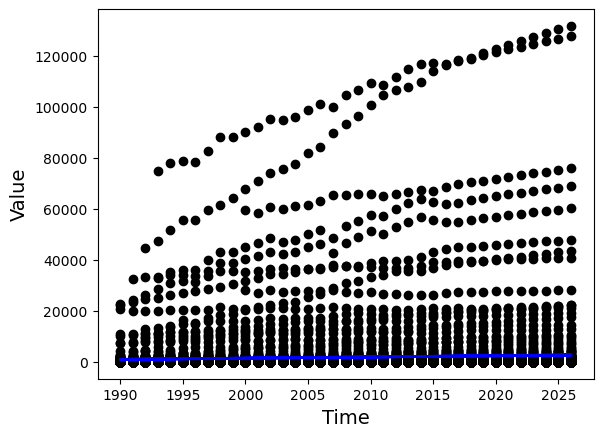

In [23]:
#Fit a least squares regression model
linModel = LinearRegression()
linModel.fit(X,y)
yPredicted = linModel.predict(X)

#Graphing
plt.scatter(X,y, color='black')
plt.plot(X,yPredicted,color='blue',linewidth=2)
plt.xlabel('Time',fontsize=14)
plt.ylabel('Value',fontsize=14)

Text(0, 0.5, 'Value')

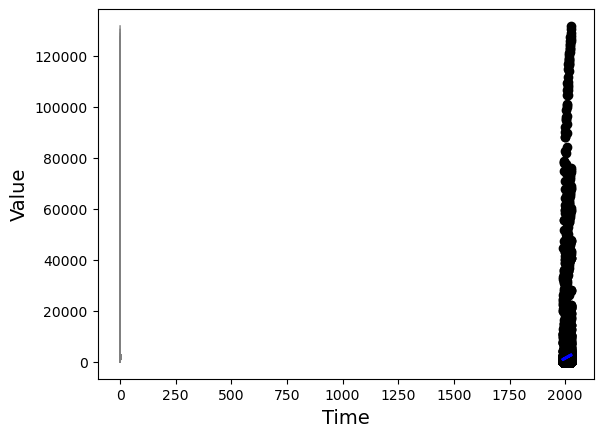

In [24]:
plt.scatter(X,y,color='black')
plt.plot(X,yPredicted,color='blue',linewidth=2)
for i in range(len(X)):
    plt.plot(X[i],X[i],[y[i],yPredicted[i]],color='grey',linewidth=1)
plt.xlabel('Time',fontsize=14)
plt.ylabel('Value',fontsize=14)